In [1]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight)
    
    return ARI, NMI, Silhouette, FMI, SGD


## 100个 Ratio A/B 从0.1到0.9

Graph Building took 0.02 seconds.
Getting edge attributes took 6.02 seconds.
Entire loop took 0.59361 seconds.
Average kernel execution time: 0.00594 seconds.
Entire loop took 0.66547 seconds.
Average kernel execution time: 0.00665 seconds.
Entire loop took 1.37843 seconds.
Average kernel execution time: 0.01378 seconds.
Graph Building took 0.01 seconds.
Getting edge attributes took 5.67 seconds.
Entire loop took 0.63354 seconds.
Average kernel execution time: 0.00634 seconds.
Entire loop took 0.63351 seconds.
Average kernel execution time: 0.00634 seconds.
Entire loop took 1.56136 seconds.
Average kernel execution time: 0.01561 seconds.
Graph Building took 0.03 seconds.
Getting edge attributes took 5.81 seconds.
Entire loop took 0.65152 seconds.
Average kernel execution time: 0.00652 seconds.
Entire loop took 0.62829 seconds.
Average kernel execution time: 0.00628 seconds.
Entire loop took 1.52083 seconds.
Average kernel execution time: 0.01521 seconds.
Graph Building took 0.03 second

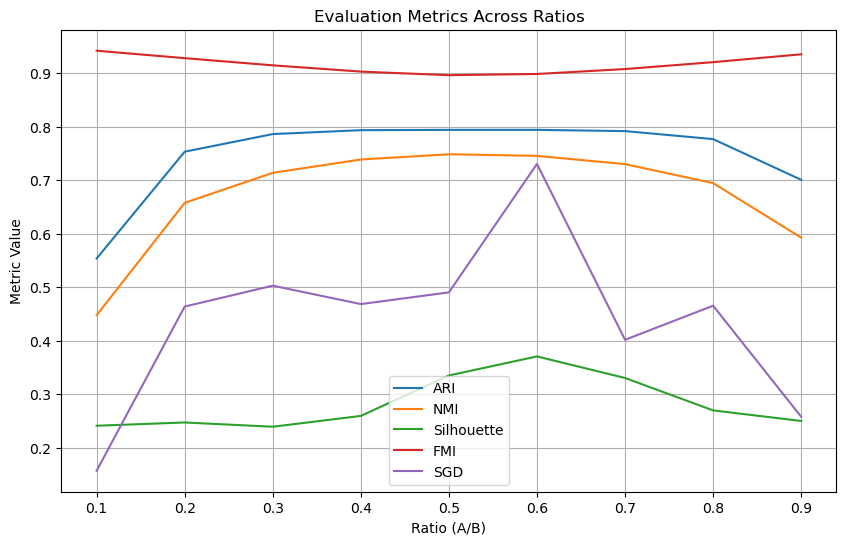

In [9]:
results = {'ARI': [], 'NMI': [], 'Silhouette': [], 'FMI': [], 'SGD': []}

for i in range(1, 10):
    coordinate_file_truth = f"data/simulate/Case3/test/Case3_100/0.{i}_truth_SpatialData.csv"
    coordinate_file_pred = f"data/simulate/Case3/test/Case3_100/0.{i}_SpatialData.csv"
    ARI, NMI, Silhouette, FMI, SGD = evaluate_metrics(coordinate_file_truth, coordinate_file_pred, apply_gene_similarity=False, apply_AD_weight=False)
    results['ARI'].append(ARI)
    results['NMI'].append(NMI)
    results['Silhouette'].append(Silhouette)
    results['FMI'].append(FMI)
    results['SGD'].append(SGD)

# 绘制折线图
plt.figure(figsize=(10, 6))
for key in results:
    plt.plot(range(1, 10), results[key], label=key)

plt.xlabel('Ratio (A/B)')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Across Ratios')
plt.legend()
plt.xticks(range(1, 10), [f'0.{i}' for i in range(1, 10)])
plt.grid(True)
plt.show()

## 1000个 A 分错5个

Graph Building took 0.09 seconds.
Getting edge attributes took 317.21 seconds.
Entire loop took 62.18145 seconds.
Average kernel execution time: 0.62181 seconds.
Entire loop took 80.88465 seconds.
Average kernel execution time: 0.80885 seconds.
Entire loop took 359.56069 seconds.
Average kernel execution time: 3.59560 seconds.
Graph Building took 0.30 seconds.
Getting edge attributes took 313.24 seconds.
Entire loop took 71.07543 seconds.
Average kernel execution time: 0.71075 seconds.
Entire loop took 56.51823 seconds.
Average kernel execution time: 0.56518 seconds.
Entire loop took 148.02873 seconds.
Average kernel execution time: 1.48016 seconds.
Graph Building took 0.27 seconds.
Getting edge attributes took 340.36 seconds.
Entire loop took 60.11150 seconds.
Average kernel execution time: 0.60112 seconds.
Entire loop took 56.11527 seconds.
Average kernel execution time: 0.56115 seconds.
Entire loop took 549.06692 seconds.
Average kernel execution time: 5.49067 seconds.
Graph Buildin

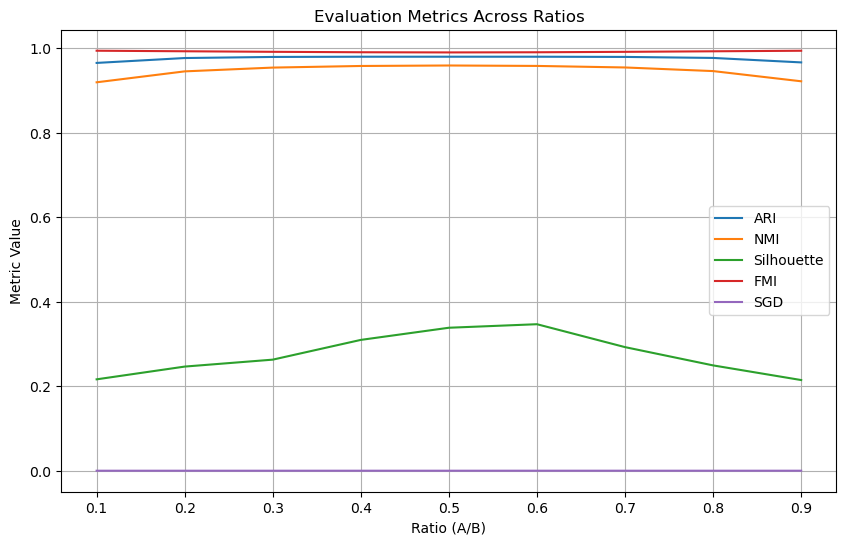

In [2]:
results = {'ARI': [], 'NMI': [], 'Silhouette': [], 'FMI': [], 'SGD': []}

for i in range(1, 10):
    coordinate_file_truth = f"data/simulate/Case3/test/Case3_1000/0.{i}_truth_SpatialData.csv"
    coordinate_file_pred = f"data/simulate/Case3/test/Case3_1000/0.{i}_SpatialData.csv"
    ARI, NMI, Silhouette, FMI, SGD = evaluate_metrics(coordinate_file_truth, coordinate_file_pred, apply_gene_similarity=False, apply_AD_weight=False)
    results['ARI'].append(ARI)
    results['NMI'].append(NMI)
    results['Silhouette'].append(Silhouette)
    results['FMI'].append(FMI)
    results['SGD'].append(SGD)

# 绘制折线图
plt.figure(figsize=(10, 6))
for key in results:
    plt.plot(range(1, 10), results[key], label=key)

plt.xlabel('Ratio (A/B)')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Across Ratios')
plt.legend()
plt.xticks(range(1, 10), [f'0.{i}' for i in range(1, 10)])
plt.grid(True)
plt.show()